In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cancer = pd.read_csv('data/cancer.csv')
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
boston = pd.read_csv('data/boston.csv')
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [5]:
from sklearn.linear_model import Ridge

Q: 샘플수가 충분한가?

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
비율범위 = np.arange(0.1, 1.1, 0.1)

train_results = {}
for 비율 in 비율범위:
    샘플수 = int(len(X_train) * 비율) + 1
    X_train_batch = X_train[:샘플수]
    y_train_batch = y_train[:샘플수]
    
    ridge = Ridge(alpha=1.0).fit(X_train_batch, y_train_batch)
    train_score = ridge.score(X_train_batch, y_train_batch)
    test_score = ridge.score(X_test, y_test)
    train_results[샘플수] = (train_score, test_score)
    
train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
38,0.819281,0.482169
76,0.764942,0.638067
114,0.797826,0.618116
152,0.769640,0.631963
190,0.757859,0.651075
228,0.726385,0.662934
266,0.733365,0.659990
304,0.744442,0.657669
342,0.759014,0.650924
380,0.765218,0.644904


In [8]:
train_test_styles = {'train': 'go--', 'test': 'ro--'}

학습 곡선

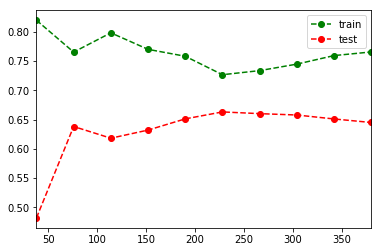

In [9]:
train_results.plot(style=train_test_styles)

## 로지스틱 회귀

In [10]:
cancer[:3]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [11]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [12]:
y.value_counts()

benign       357
malignant    212
Name: type, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logreg.score(X_test, y_test)

0.965034965034965

활성화 함수에 따른 효과

In [17]:
예측확률 = logreg.predict_proba(X_test)

In [18]:
pd.DataFrame(예측확률)[:10]

,0,1
0,9.945650e-01,0.005435
1,9.761512e-01,0.023849
2,1.592404e-03,0.998408
3,9.995614e-01,0.000439
4,3.237917e-04,0.999676
5,9.965476e-01,0.003452
6,2.066024e-07,1.000000
7,7.640799e-01,0.235920
8,3.781010e-01,0.621899
9,9.994650e-01,0.000535


In [19]:
C_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

train_results = {}
for C in C_range:
    logreg = LogisticRegression(C=C).fit(X_train, y_train)    
    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)
    train_results[C] = (train_score, test_score)
    
train_results = pd.DataFrame(train_results).T
train_results.columns = ['train', 'test']
train_results

,train,test
0.001,0.924883,0.923077
0.010,0.934272,0.937063
0.100,0.946009,0.951049
1.000,0.957746,0.965035
10.000,0.960094,0.972028
100.000,0.960094,0.972028
1000.000,0.967136,0.972028


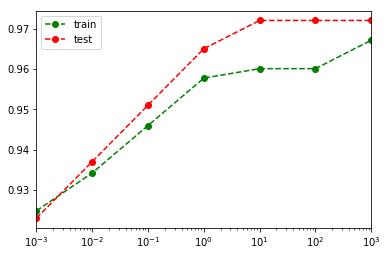

In [20]:
train_results.plot(logx=True, style=train_test_styles)

Q: 샘플이 모자르고, 구하기 어렵다면?

In [22]:
iris = pd.read_csv('data/iris.data', header=None)

In [27]:
평균, 편차 = iris[0].mean(), iris[0].std()

In [28]:
np.random.normal(평균, 편차, size=100)

array([ 4.2594217 ,  5.42052996,  5.22168483,  6.16129782,  5.45818129,
        6.29381826,  5.88401083,  6.19252284,  6.44394698,  5.9348263 ,
        6.28143641,  6.73816947,  7.02401144,  5.56554219,  6.22931424,
        5.34570616,  4.91984965,  5.70512615,  5.38688574,  5.56287356,
        5.38836672,  7.05670846,  6.62203149,  6.33244118,  5.20482022,
        5.76271998,  6.29188547,  5.62995599,  4.18932883,  4.75484121,
        6.36502178,  6.12388403,  6.18863863,  5.03400203,  5.70452708,
        4.70543328,  6.53627472,  6.639158  ,  5.18913684,  5.97036235,
        5.70095333,  4.97722265,  4.98572987,  7.47552644,  6.36531642,
        4.05956986,  6.00951433,  3.8879263 ,  6.2975166 ,  5.71435508,
        5.2058891 ,  5.42466342,  6.48232163,  5.06064275,  7.22997606,
        6.6150245 ,  5.72938856,  4.8184443 ,  4.37204742,  5.22741674,
        5.41799649,  6.14745766,  6.50992759,  4.73869264,  4.76240276,
        5.98245678,  6.34808403,  5.65876193,  5.66235062,  6.58

In [30]:
y = iris[4]
X = iris.values[:, :4].astype('float32')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
logreg = LogisticRegression(C=1.0).fit(X_train, y_train)

In [33]:
logreg.score(X_test, y_test)

0.97368421052631582

In [34]:
w = logreg.coef_
b = logreg.intercept_

In [35]:
w.shape

(3, 4)

In [37]:
from deepy.dataset import mnist

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_mnist(
    flatten=False, normalize=False)

In [39]:
X_train.shape

(60000, 1, 28, 28)

In [40]:
x = X_train[0]

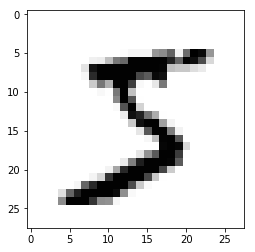

In [43]:
plt.imshow(x.reshape(28, 28), 'Greys')

In [44]:
y_train[0]

5

In [46]:
X_train.reshape(60000, 1*28*28).shape

(60000, 784)